# Лабораторная работа 1
### Выполнил: Агафонов Илья Игоревич

Добро пожаловать в лабораторную работу!
Оформите ваше решение контеста Kaggle в соответствии с этим шаблоном. Ваша задача - показать проверяющим ход ваших рассуждений, поэтому советуем писать много комментариев к коду и приводить комментарии к логике на каждом этапе в текстовых ячейках.
Где необходимо, используйте графики для большей наглядности.

При отправке поменяйте название файла на ваши ФИО!

### EDA (исследовательский анализ данных)

В этом разделе вам необходимо провести анализ вашего датасета, интерпретировать признаки, выяснить их значимость и исследовать зависимости между ними.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,theta1,theta2,price
20747,53511,0.71,Premium,F,VS2,61.9,59.0,5.75,5.72,3.55,22,17,2686
23931,2168,0.82,Ideal,G,SI1,61.8,55.0,6.02,6.05,3.73,30,31,3133
18536,2423,0.63,Ideal,E,VVS1,61.1,58.0,5.49,5.54,3.37,19,33,3181
33389,8011,1.15,Premium,E,SI2,61.7,60.0,6.78,6.70,4.16,22,10,4328
34010,23447,1.20,Premium,E,VVS2,61.4,56.0,6.94,6.83,4.23,5,7,11435


In [5]:
data.dtypes

,0
id,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
x,float64
y,float64
z,float64


Посмотрим сколько пропусков в каждой колонке

In [6]:
data.isna().sum()

,0
id,0
carat,0
cut,0
color,0
clarity,64
depth,57
table,0
x,48
y,60
z,42


Видим, что nan-ов не так много, поэтому можно попробовать заменить пропущенные значения на моду или медиану(Сделаем это в блоке обработки данных)

Поделим столбцы на числовые, категориальные и на целевую переменную

In [7]:
num_cols = ['carat','depth','table','x','y','z','theta1','theta2']
cat_cols = ['cut','color','clarity']
target = ['price']

In [8]:
data['price'].value_counts()

,count
price,
605,111
789,103
802,103
625,100
776,99
...,...
16665,1
13655,1
13642,1


Посмотрим на price.Как видим, целевая переменная сильно скошена влево

<Axes: xlabel='price', ylabel='Count'>

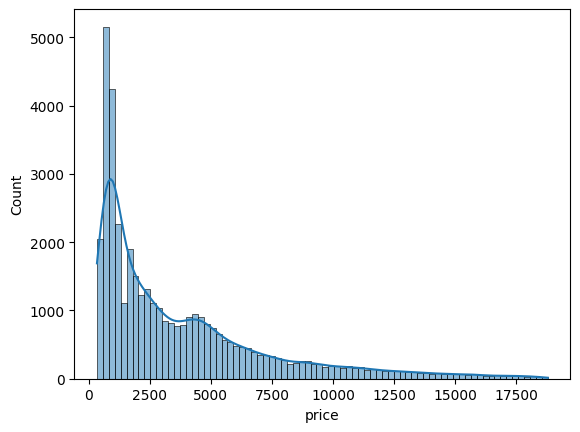

In [9]:
sns.histplot(data['price'], kde=True)

Посмотри на гистограммы и ящики с усами у числовых признаков.

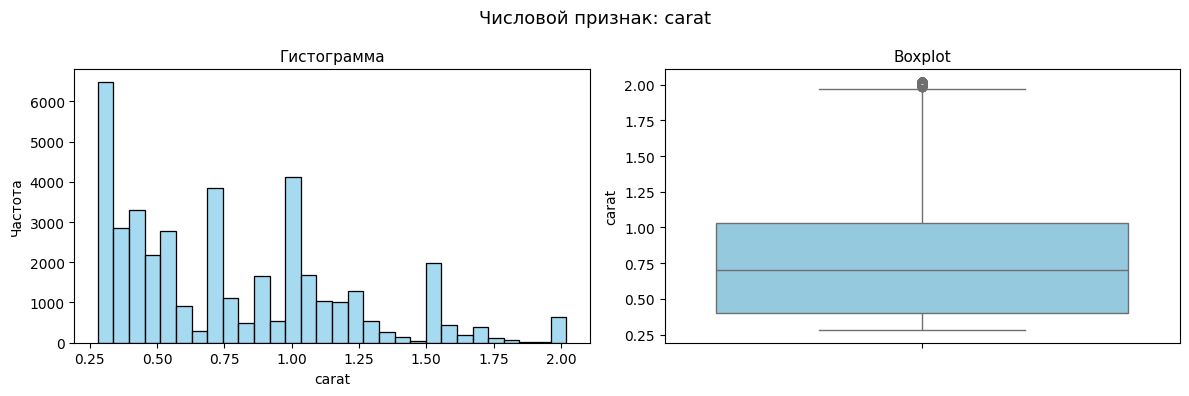

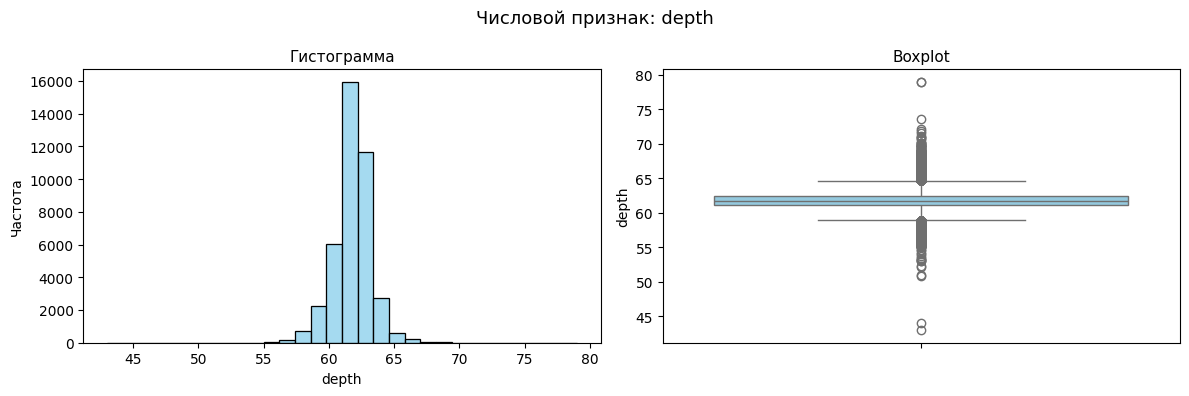

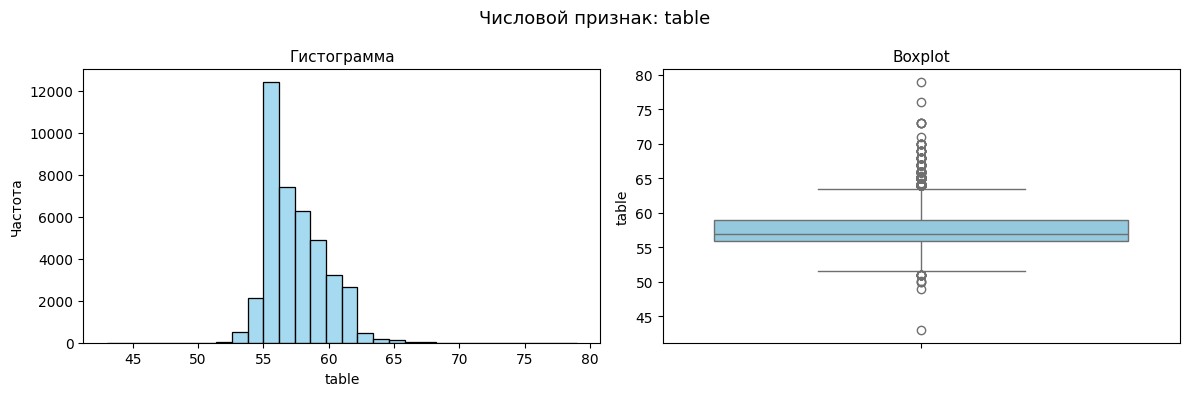

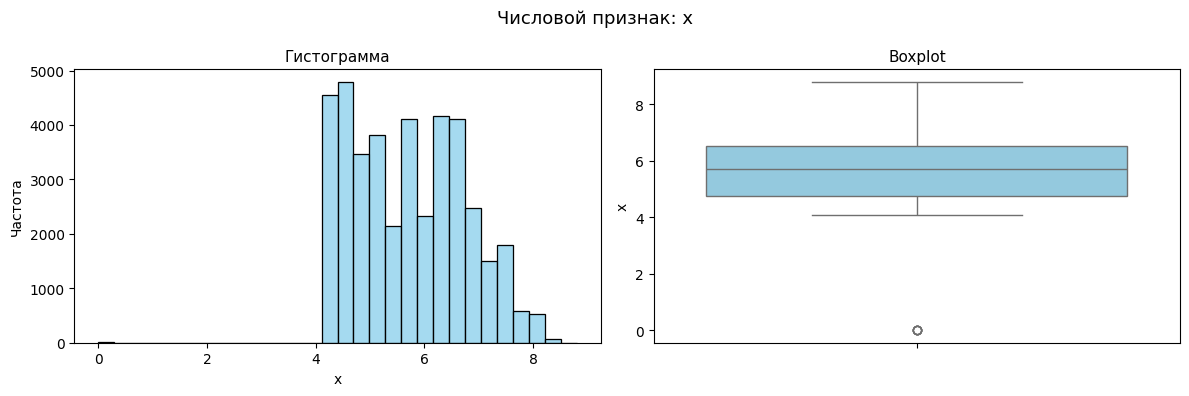

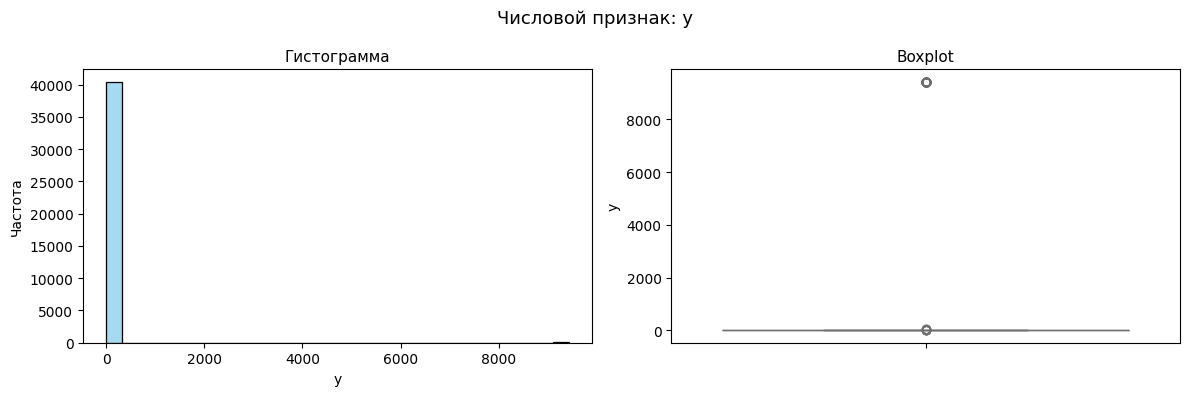

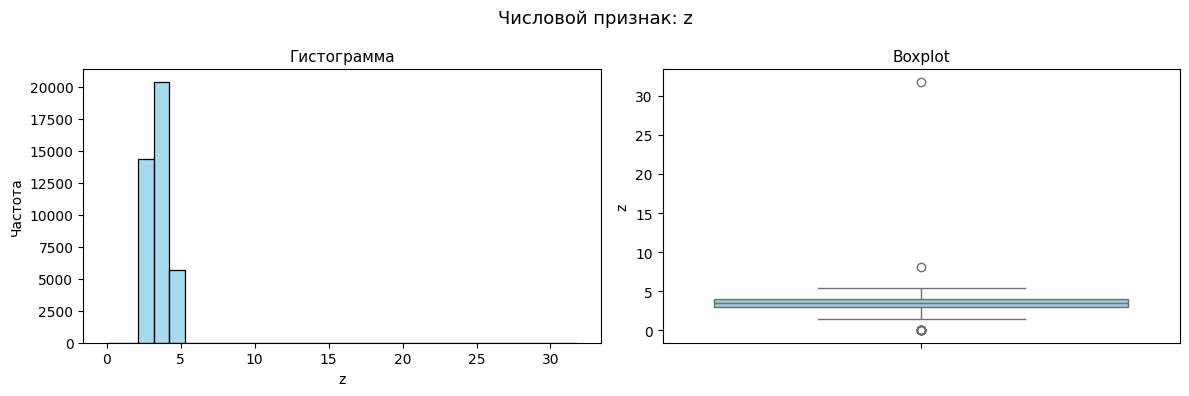

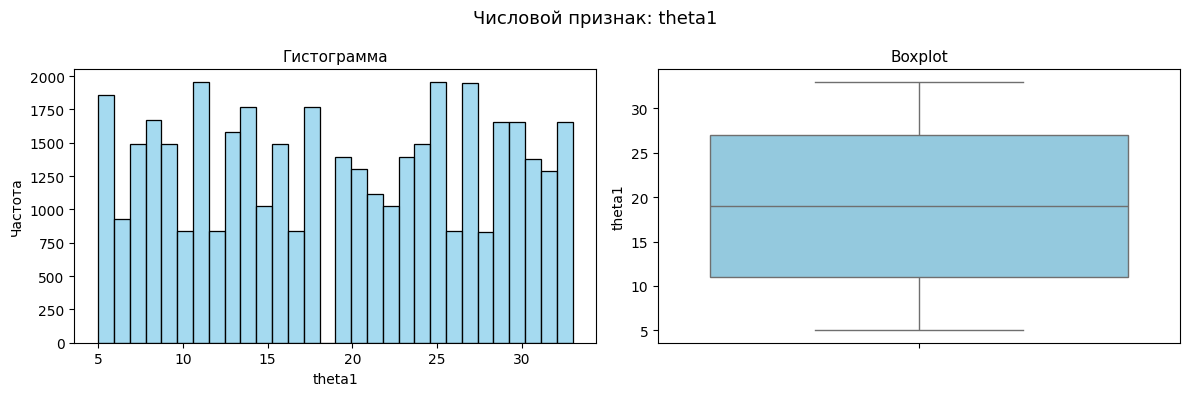

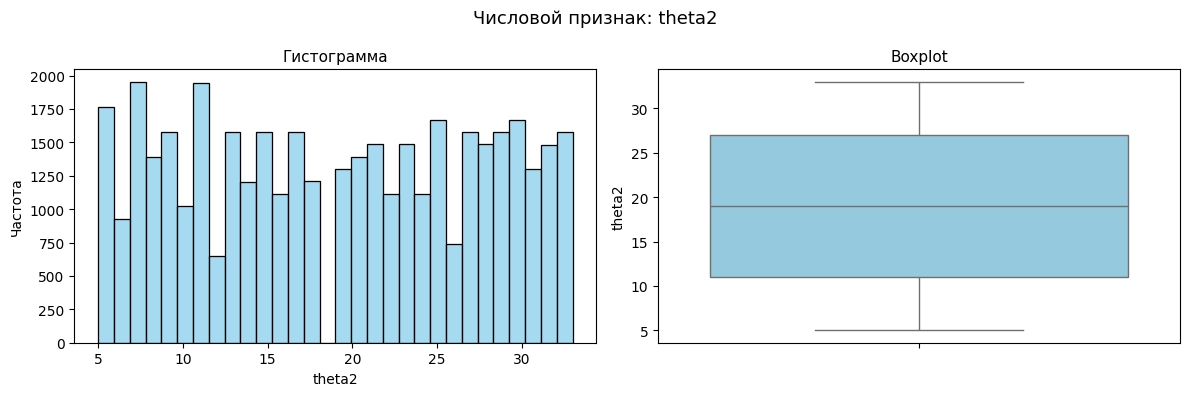

In [10]:
for col in num_cols:
    s = data[col].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Числовой признак: {col}", fontsize=13)

    sns.histplot(s, bins=30, ax=axes[0], color='skyblue')
    axes[0].set_title("Гистограмма", fontsize=11)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Частота")
    sns.boxplot(y=s, ax=axes[1], color='skyblue')
    axes[1].set_title("Boxplot", fontsize=11)
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

Из ящика с усами пока понятно, что z, y, x, table, depth, carat имеют выбросы.
Посмотрим на процент выбросов в числовых признаках

In [11]:
for col in ['x','y','z','carat','table','depth']:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  outliers = data[(data[col] < lower) | (data[col] > upper)]
  print(f"Процент выбросов y {col}: {len(outliers)/len(data)*100:.2f}%")

Процент выбросов y x: 0.01%
Процент выбросов y y: 0.15%
Процент выбросов y z: 0.03%
Процент выбросов y carat: 1.59%
Процент выбросов y table: 1.07%
Процент выбросов y depth: 5.43%


Процент выбросов у числовых признаков в процентном соотношении не такой уж и большой(Максимум - это чуть больше 5 процентов)

Матрица корреляций числовых признаков и целевой перменной

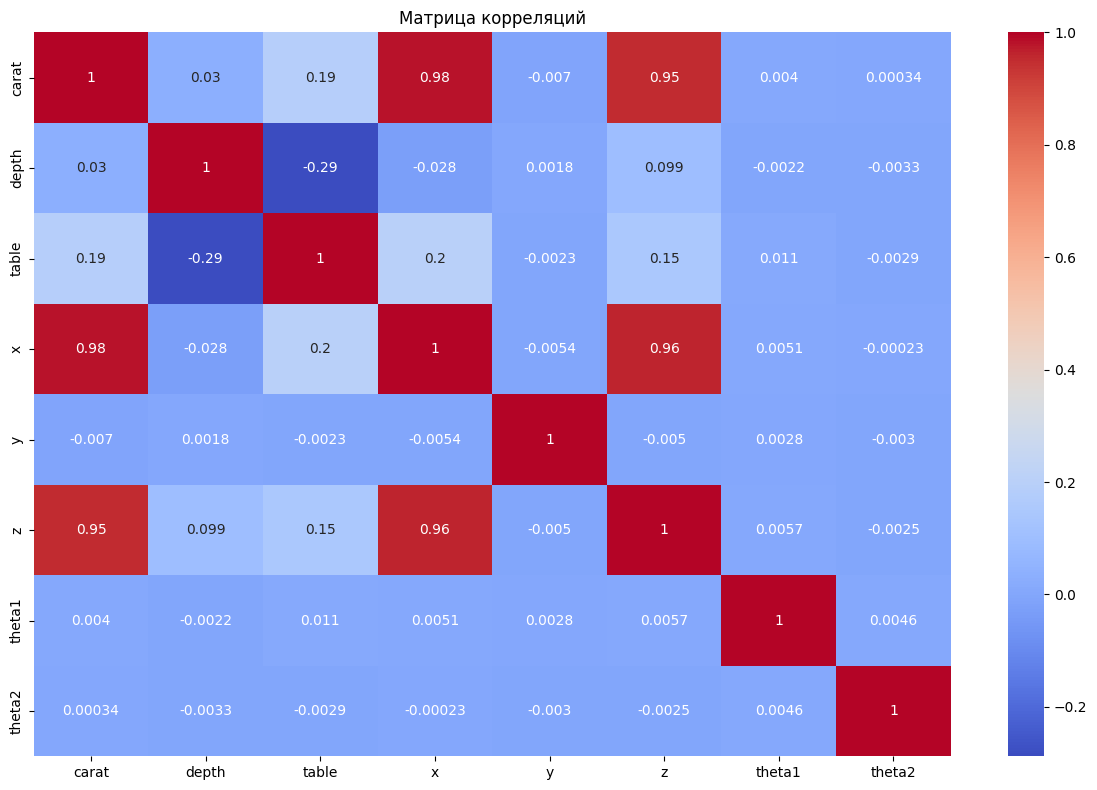

In [12]:
plt.figure(figsize=(12,8))
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

Проанализировав матрицу приходим к выводу, что  carat и x, carat и z, x и z имеют сильную линейную зависимость, остальные признаки слабо зависимы

Для наглядности построим график зависимости carat от x, carat от z, x от z

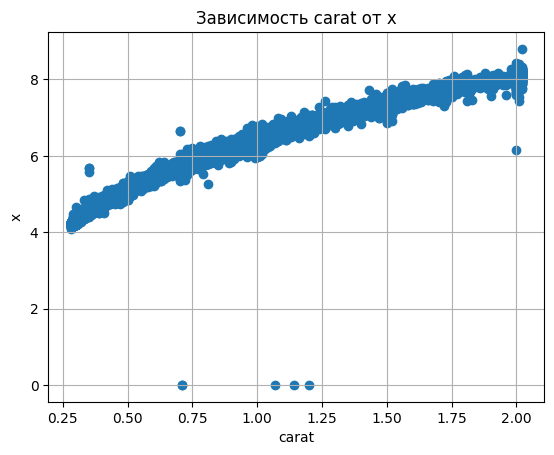

In [13]:

plt.scatter(data['carat'], data['x'])
plt.xlabel('carat')
plt.ylabel('x')
plt.title('Зависимость carat от x')
plt.grid(True)
plt.show()

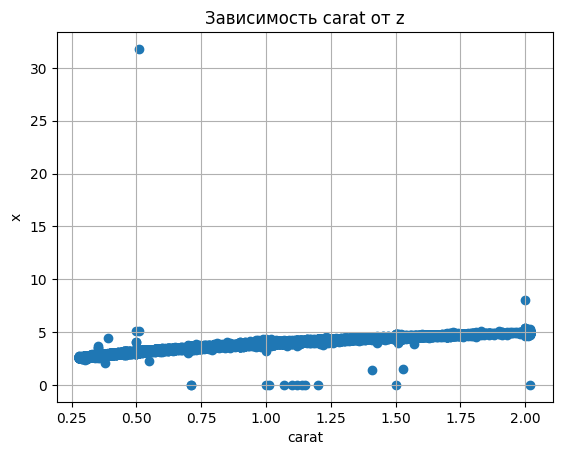

In [14]:
plt.scatter(data['carat'], data['z'])
plt.xlabel('carat')
plt.ylabel('x')
plt.title('Зависимость carat от z')
plt.grid(True)
plt.show()

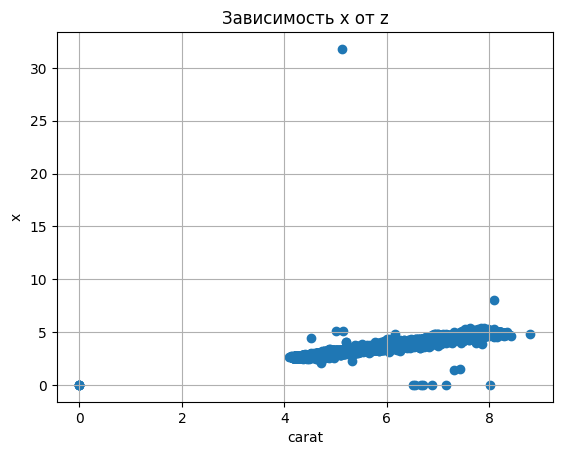

In [15]:
plt.scatter(data['x'], data['z'])
plt.xlabel('carat')
plt.ylabel('x')
plt.title('Зависимость x от z')
plt.grid(True)
plt.show()

Анализ качественных данных(Построим гистограммы)

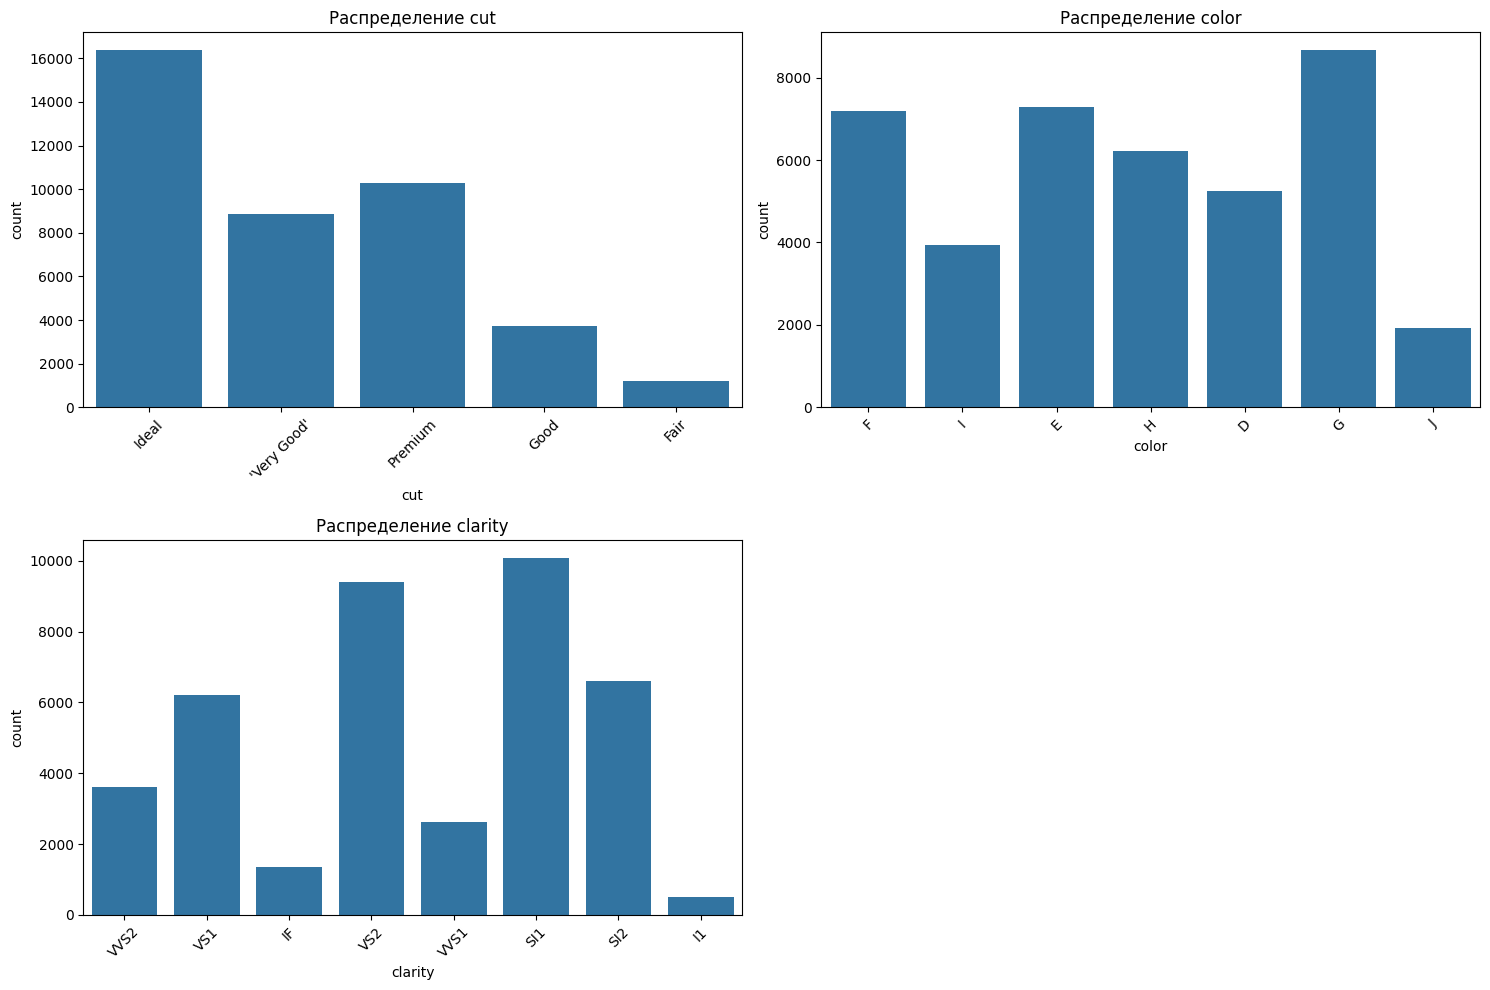

In [16]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
axes = axes.flatten()
for i,column in enumerate(cat_cols):
  sns.countplot(data=data,x=column,ax=axes[i])
  axes[i].set_title(f"Распределение {column}")
  axes[i].tick_params(axis='x',rotation=45)
for j in range(i + 1,len(axes)):
  axes[j].set_visible(False)
plt.tight_layout()
plt.show()

Построим boxplot у каждого категориального признака, чтобы посмотреть какие-есть выбросы

<Axes: xlabel='cut', ylabel='price'>

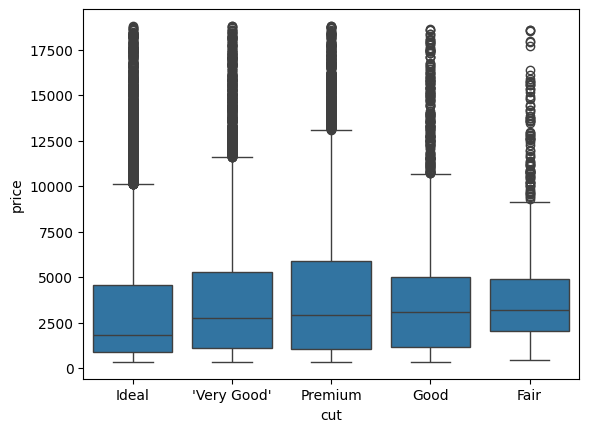

In [17]:
sns.boxplot(x='cut', y='price', data=data)

<Axes: xlabel='clarity', ylabel='price'>

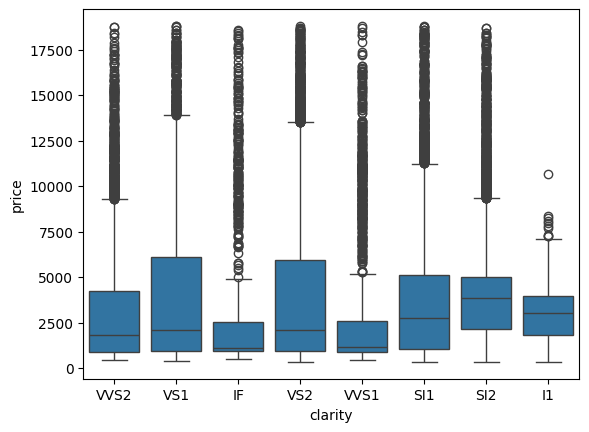

In [18]:
sns.boxplot(x='clarity', y='price', data=data)

<Axes: xlabel='color', ylabel='price'>

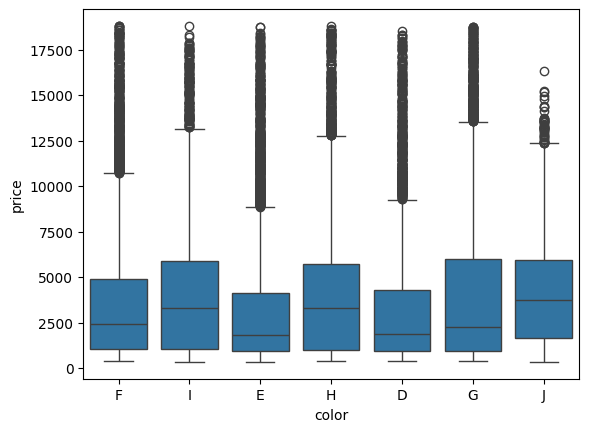

In [19]:
sns.boxplot(x='color', y='price', data=data)

Смотрим на распределение долей у категориальных признаков

In [20]:
data['color'].value_counts(normalize=True)

,proportion
color,
G,0.214224
E,0.179863
F,0.177910
H,0.153437
D,0.129879
I,0.097076
J,0.047611


In [21]:
data['cut'].value_counts(normalize=True)

,proportion
cut,
Ideal,0.404791
Premium,0.254542
'Very Good',0.219440
Good,0.091662
Fair,0.029565


In [22]:
data['clarity'].value_counts(normalize=True)

,proportion
clarity,
SI1,0.249622
VS2,0.232489
SI2,0.163609
VS1,0.153606
VVS2,0.089257
VVS1,0.064968
IF,0.033821
I1,0.012627


Посчитаем среднее для каждой категории

In [23]:
data.groupby('cut')['price'].mean().sort_values()


,price
cut,
Ideal,3319.917008
Good,3814.540453
'Very Good',3899.440577
Fair,4057.063545
Premium,4192.178401


In [24]:
data.groupby('color')['price'].mean().sort_values()

,price
color,
E,3127.265668
D,3212.335173
F,3733.979436
G,3903.824486
H,4166.482198
J,4220.801142
I,4282.198880


In [25]:
data.groupby('clarity')['price'].mean().sort_values()

,price
clarity,
VVS1,2705.924924
IF,2996.509517
I1,3148.288235
VVS2,3516.884605
SI1,3725.690637
VS2,3831.271459
VS1,3873.274339
SI2,4218.084292


### Preprocessing (подготовка данных)

 В этом разделе вам необходимо реализовать подготовку ваших данных, в том числе заполнение пропусков, фильтрацию выбросов, кодирование категориальных признаков и т.д. В этот же раздел включите любые операции над данными, которые сочтете нужными.

Заменим пропущенные значения медианой

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40453 entries, 0 to 40452
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40453 non-null  int64  
 1   carat    40453 non-null  float64
 2   cut      40453 non-null  object 
 3   color    40453 non-null  object 
 4   clarity  40389 non-null  object 
 5   depth    40396 non-null  float64
 6   table    40453 non-null  float64
 7   x        40405 non-null  float64
 8   y        40393 non-null  float64
 9   z        40411 non-null  float64
 10  theta1   40453 non-null  int64  
 11  theta2   40453 non-null  int64  
 12  price    40453 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.0+ MB


In [27]:
data.isna().sum()

,0
id,0
carat,0
cut,0
color,0
clarity,64
depth,57
table,0
x,48
y,60
z,42


Заменим все пропуски числовых категориях на моду.Заменял на моду, а не на медиану,потому что у нас гисторграммы скошенные, в этом случае лучше выбрать моду

In [28]:
data['x'] = data['x'].fillna(data['x'].mode()[0])
data['y'] = data['y'].fillna(data['y'].mode()[0])
data['z'] = data['z'].fillna(data['z'].mode()[0])
data['depth'] = data['depth'].fillna(data['depth'].mode()[0])

Заменим пропущенные значения у clarity на SI1 , то есть на моду

In [29]:
data['clarity'] = data['clarity'].fillna(data['clarity'].mode()[0])

In [30]:
data.isna().sum()

,0
id,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0


Работаем с выбросами

In [31]:
for col in ['depth','carat','table']:
  lower_cap = data[col].quantile(0.01)
  upper_cap = data[col].quantile(0.99)
  data[col] = np.clip(data[col], lower_cap, upper_cap)

Обработка категориальных признаков

Заменим цвета E и D на один, так как их boxplots очень близки друг к другу

In [32]:
data['color'] = data['color'].replace({'E': 'E_D', 'D': 'E_D'})

С cut сделаем тоже самое

In [33]:
data['cut'] = data['cut'].replace({'Good': 'Beautiful', 'Fair': 'Beautiful'})

И с clarity

In [34]:
data['clarity']=data['clarity'].replace({'SI2':'SI2_IF_I1','IF':'SI2_IF_I1','I1':'SI2_IF_I1'})

Воспользуемся one-hot-encoding для преобразования категориальных колонок в числовые

In [35]:
data = pd.get_dummies(data,columns = ['cut','color','clarity'])



In [36]:
data = data.astype(float)
data

,id,carat,depth,table,x,y,z,theta1,theta2,price,...,color_G,color_H,color_I,color_J,clarity_SI1,clarity_SI2_IF_I1,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,17044.0,0.30,61.6,55.0,4.22,4.26,2.61,5.0,5.0,612.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,30625.0,0.30,62.5,54.0,4.18,4.23,2.63,5.0,6.0,448.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,17043.0,0.30,62.2,55.0,4.23,4.26,2.69,5.0,7.0,612.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,37947.0,0.30,63.0,59.0,4.11,4.15,2.60,5.0,8.0,487.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,30626.0,0.30,62.4,54.0,4.18,4.19,2.61,5.0,9.0,448.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,25132.0,2.01,62.0,59.0,8.06,8.08,5.00,27.0,23.0,13687.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
40449,25135.0,2.01,59.3,60.0,8.28,8.34,4.93,27.0,24.0,13693.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
40450,27141.0,2.01,60.4,58.0,8.20,8.16,4.94,27.0,25.0,17357.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40451,24778.0,2.01,59.0,61.0,8.26,8.31,4.89,27.0,27.0,13144.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Model & training (Выбор модели и её обучение)

В этом разделе описываете модель и ставите эксперименты по обучению.

Если вы ставили много экспериментов, приведите их в хронологическом порядке чтобы мы увидели эволюцию ваших рассуждений.

#### Эксперимент 1(Линейная регрессия)

In [37]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error

X = data.drop(columns=['id', 'price'])
y = data['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

pipe_lr = Pipeline([('scaler', StandardScaler()),('svr', LinearRegression())])

param_grid_lr = {}
search_lr = GridSearchCV(
    pipe_lr,
    param_grid_lr,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)
search_lr.fit(X_train, y_train)
best_model = search_lr.best_estimator_
y_pred = best_model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_pred)
print(f"Лучшие параметры: {search_lr.best_params_}")
print(f"Лучший MAE на кросс-валидации: {-search_lr.best_score_:.2f}")
print(f"MAE на валидации: {mae_val:.2f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Лучшие параметры: {}
Лучший MAE на кросс-валидации: 749.84
MAE на валидации: 739.70


#### Эксперимент 2

L2 - регуляризация

In [38]:
pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(max_iter=14000))])

param_grid = {
    'ridge__alpha': [0.01,1,2],
    'ridge__solver': ['auto', 'saga', 'cholesky'],
}

search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


search.fit(X_train, y_train)
best_model = search.best_estimator_
y_pred = best_model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_pred)

print(f"Лучшие параметры: {search.best_params_}")
print(f"Лучший MAE во время кросс-валидации: {-search.best_score_:.4f}")
print(f"MAE на валидационной выборке: {mae_val:.2f}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Лучшие параметры: {'ridge__alpha': 0.01, 'ridge__solver': 'auto'}
Лучший MAE во время кросс-валидации: 749.8372
MAE на валидационной выборке: 739.70


#### Эксперимент 3

L1-регуляризация

In [39]:
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(max_iter=14000))])

param_grid = {
    'lasso__alpha': [0.01,1,2,10],
}

search_lasso = GridSearchCV(
    pipe_lasso,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


search_lasso.fit(X_train, y_train)
best_model = search_lasso.best_estimator_
y_pred = best_model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_pred)

print(f"Лучшие параметры: {search_lasso.best_params_}")
print(f"Лучший MAE во время кросс-валидации: {-search_lasso.best_score_:.4f}")
print(f"MAE на валидационной выборке: {mae_val:.2f}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Лучшие параметры: {'lasso__alpha': 0.01}
Лучший MAE во время кросс-валидации: 749.8406
MAE на валидационной выборке: 739.71


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.023e+07, tolerance: 4.216e+07
  model = cd_fast.enet_coordinate_descent(


#### Эксперимент 4

LinearSVR

In [40]:
pipe_svr = Pipeline([('scaler', StandardScaler()),('svr', LinearSVR(random_state=42, max_iter=10000))])


param_grid_svr = {
    'svr__C': [0.001,0.1, 1, 10],
    'svr__epsilon': [0.001,0.01, 0.1, 1]
}


search_svr = GridSearchCV(
    pipe_svr,
    param_grid_svr,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)


search_svr.fit(X_train, y_train)
best_model = search_svr.best_estimator_
y_pred = best_model.predict(X_val)

mae_val = mean_absolute_error(y_val, y_pred)
print(f"Лучшие параметры: {search_svr.best_params_}")
print(f"Лучший MAE на кросс-валидации: {-search_svr.best_score_:.2f}")
print(f"MAE на валидации: {mae_val:.2f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Лучшие параметры: {'svr__C': 10, 'svr__epsilon': 0.001}
Лучший MAE на кросс-валидации: 679.84
MAE на валидации: 667.48


### Evaluation (оценка качества модели)

В этом разделе проводите оценку качества вашей итоговой модели.

Обрабатываем train test и тестируем нашу лучшую модель. У нас это модель в 3 эксперименте, так как у нее самый маленький MAE

In [41]:
X_test = pd.read_csv('test.csv')

In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13487 entries, 0 to 13486
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13487 non-null  int64  
 1   carat    13487 non-null  float64
 2   cut      13487 non-null  object 
 3   color    13487 non-null  object 
 4   clarity  13487 non-null  object 
 5   depth    13487 non-null  float64
 6   table    13487 non-null  float64
 7   x        13487 non-null  float64
 8   y        13487 non-null  float64
 9   z        13487 non-null  float64
 10  theta1   13487 non-null  int64  
 11  theta2   13487 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.2+ MB


In [43]:
X_test['color'] = X_test['color'].replace({'E': 'E_D', 'D': 'E_D'})
X_test['cut'] = X_test['cut'].replace({'Good': 'Beautiful', 'Fair': 'Beautiful'})
X_test['clarity']=X_test['clarity'].replace({'SI2':'SI2_IF_I1','IF':'SI2_IF_I1','I1':'SI2_IF_I1'})

In [44]:
X_test = pd.get_dummies(X_test,columns = cat_cols)
X_test = X_test.astype(float)

In [45]:
best_model = search_svr.best_estimator_
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test.drop(columns='id'))
y_pred = pd.DataFrame({'id':X_test['id'],'price':y_pred})
y_pred['id'] = y_pred['id'].astype(int)
y_pred.to_csv('my_new_submission.csv',index=False)

In [46]:
y_pred.shape

(13487, 2)

### Conclusion (Выводы)

В этом разделе описываете полученные результаты и проводите анализ выполненной работы.
Что получилось / не получилось и почему?

Самой лучшей моделью оказалась LinearSVR, то есть линейный SVM.Во время работы я предобработал данные, избавился от всех пустых значений, заменил категориальные признаки на числовые.Модели с регуляризацией показали себя лучше чем линейная регрессия, так как у нас в датасете были сильно линейно зависимые признаки.


Что не получилось: хотелось бы уменьшить значение MAE, но непонятно как еще это можно сделать, возможно проблема в том, что я недостаточно обработал данные, чтобы их обучать или не заметил каких-то закономерностей в данных.